# MANE 4962 Exam 2

Lucas Zhou 662005044

## Problem 1

### a) Import and Visualize

4422102/4422102 [==============================] - 0s 0us/step


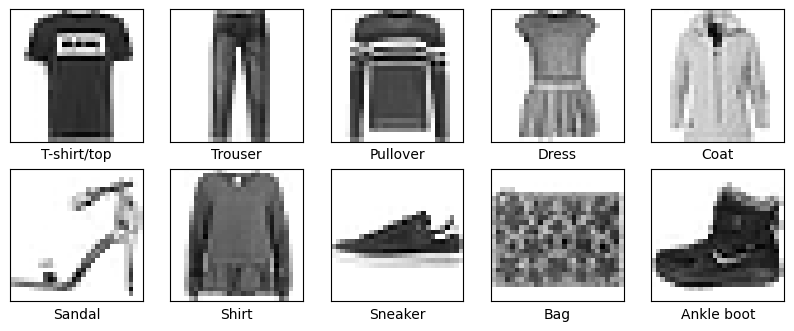

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot an image from each class
plt.figure(figsize=(10,10))
for i in range(len(class_names)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Find an image in the training set
    img_index = np.where(train_labels == i)[0][0]
    plt.imshow(train_images[img_index], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.show()


### b) Construct the model

In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10) # No activation function here, it will be specified in the loss function
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Normalize data
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

# Reshape for the model input
train_images_reshaped = train_images_norm.reshape((-1, 28, 28, 1))
test_images_reshaped = test_images_norm.reshape((-1, 28, 28, 1))

# Train the model
history = model.fit(train_images_reshaped, train_labels, epochs=5,
                    batch_size=64, validation_data=(test_images_reshaped, test_labels))


Epoch 1/5
938/938 [==============================] - 13s 5ms/step - loss: 0.4931 - accuracy: 0.8205 - val_loss: 0.3815 - val_accuracy: 0.8633
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.3291 - accuracy: 0.8804 - val_loss: 0.3133 - val_accuracy: 0.8886
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2823 - accuracy: 0.8968 - val_loss: 0.2839 - val_accuracy: 0.9002
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2496 - accuracy: 0.9083 - val_loss: 0.2875 - val_accuracy: 0.8947
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2263 - accuracy: 0.9170 - val_loss: 0.2735 - val_accuracy: 0.9014


### c) Plot loss

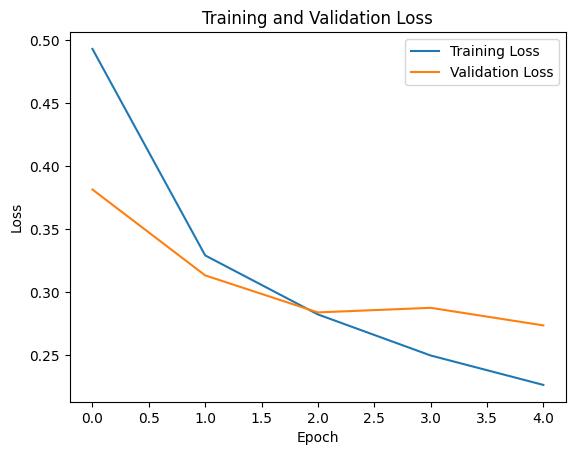

In [4]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


d) Plot accuracy

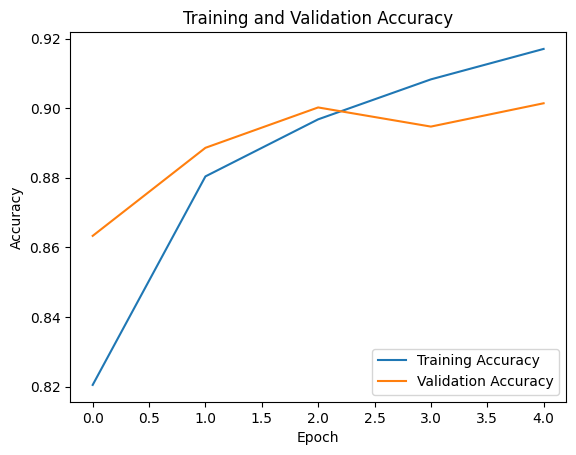

In [5]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


## Problem 2

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Combine and normalize datasets
combined_images = np.concatenate([train_images_norm, test_images_norm]).reshape((70000, -1))
combined_labels = np.concatenate([train_labels, test_labels])

# PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(combined_images)
print("Sum of explained variance ratio:", np.sum(pca.explained_variance_ratio_))


Sum of explained variance ratio: 0.5281266110340144


## Problem 3

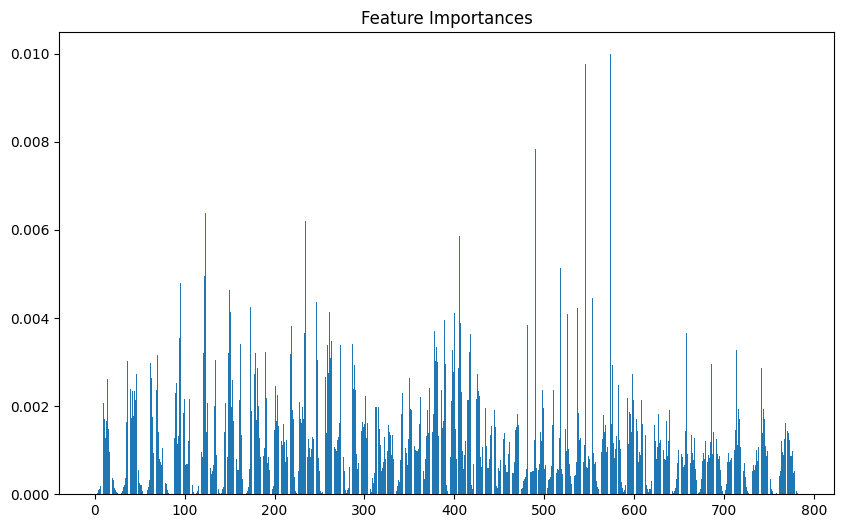

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Random Forest
rf = RandomForestClassifier(n_estimators=200)
rf.fit(combined_images, combined_labels)

# Feature Importance
importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(combined_images.shape[1]), importances)
plt.show()


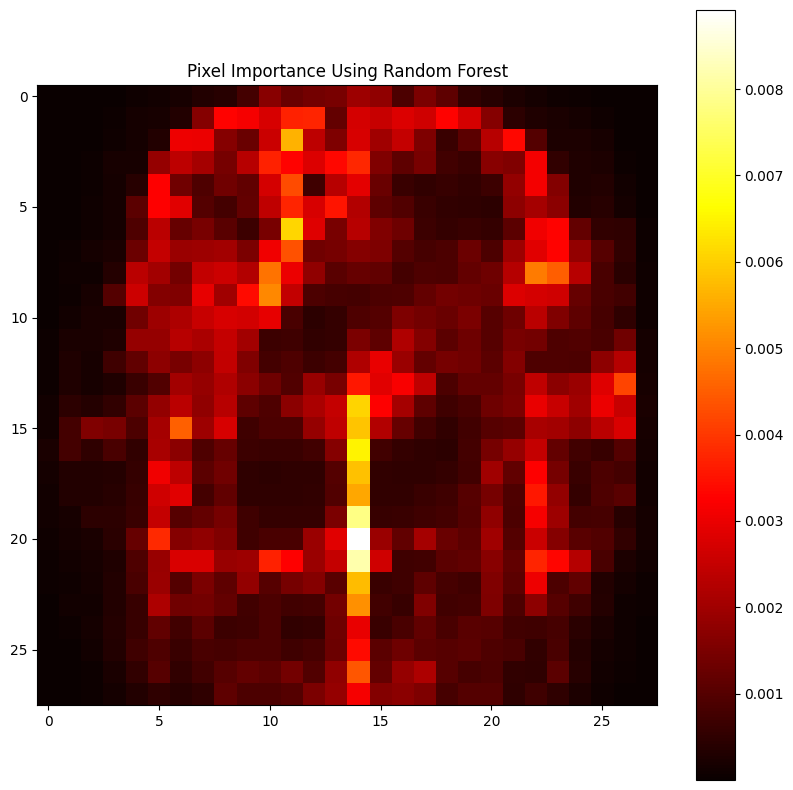

In [6]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize and reshape the dataset
train_images = train_images / 255.0
test_images = test_images / 255.0
combined_images = np.concatenate((train_images, test_images), axis=0).reshape(-1, 28*28)
combined_labels = np.concatenate((train_labels, test_labels), axis=0)

# Initialize the Random Forest classifier with 200 decision trees
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model to the combined dataset
rf_classifier.fit(combined_images, combined_labels)

# Get the feature importances
importances = rf_classifier.feature_importances_

# Reshape the importances to match the 28x28 image size
importances_reshaped = importances.reshape(28, 28)

# Plot the feature importances
plt.figure(figsize=(10, 10))
plt.imshow(importances_reshaped, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Pixel Importance Using Random Forest')
plt.show()
